In [23]:
import pandas as pd
#import geopandas as gp
import statsmodels.formula.api as smf
import statsmodels.stats.sandwich_covariance as sw
import os
import pylab as pl
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['figure']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [24]:
!curl https://data.cityofnewyork.us/api/views/hxm3-23vy/rows.csv?accessType=DOWNLOAD > edesignations.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  719k    0  719k    0     0  1111k      0 --:--:-- --:--:-- --:--:-- 1110k


In [25]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/pyk222/PUIdata


In [26]:
!mv edesignations.csv $PUIDATA

In [27]:
!ls $PUIDATA

edesignations.csv


In [28]:
#read in the data with pandas
df = pd.read_csv("%s/edesignations.csv"%os.getenv("PUIDATA"))
df.head(7)

,ENumber,E Effective Date,BOROCODE,TAXBLOCK,TAXLOT,HazMat Code,Air Code,Noise Code,HazMat Date,Air Date,Noise Date,CEQR_NUM,ULURP_NUM
0,E-1,04/28/1983,3,319,1,0,0,1,NaN,NaN,NaN,82-252K,830178 ZMK
1,E-1,04/28/1983,3,319,10,0,0,1,NaN,NaN,NaN,82-252K,830178 ZMK
2,E-1,04/28/1983,3,319,11,0,0,1,NaN,NaN,NaN,82-252K,830178 ZMK
3,E-1,04/28/1983,3,319,12,0,0,1,NaN,NaN,05/31/2018,82-252K,830178 ZMK
4,E-1,04/28/1983,3,319,13,0,0,1,NaN,NaN,05/31/2018,82-252K,830178 ZMK
5,E-1,04/28/1983,3,319,14,0,0,1,NaN,NaN,NaN,82-252K,830178 ZMK
6,E-1,04/28/1983,3,319,15,0,0,1,NaN,NaN,NaN,82-252K,830178 ZMK


In [29]:
df.tail(8)

,ENumber,E Effective Date,BOROCODE,TAXBLOCK,TAXLOT,HazMat Code,Air Code,Noise Code,HazMat Date,Air Date,Noise Date,CEQR_NUM,ULURP_NUM
11354,R-98,02/02/2007,4,9363,44,1,0,0,NaN,NaN,NaN,02DCP063Q,030032 ZSQ
11355,R-98,02/02/2007,4,9363,46,1,0,0,NaN,NaN,NaN,02DCP063Q,030032 ZSQ
11356,R-98,02/02/2007,4,9363,48,1,0,0,NaN,NaN,NaN,02DCP063Q,030032 ZSQ
11357,R-98,02/02/2007,4,9363,50,1,0,0,NaN,NaN,NaN,02DCP063Q,030032 ZSQ
11358,R-98,02/02/2007,4,9363,52,1,0,0,NaN,NaN,NaN,02DCP063Q,030032 ZSQ
11359,R-98,02/02/2007,4,9363,54,1,0,0,NaN,NaN,NaN,02DCP063Q,030032 ZSQ
11360,R-98,02/02/2007,4,9363,8,1,0,0,NaN,NaN,NaN,02DCP063Q,030032 ZSQ
11361,R-99,02/07/2007,3,2849,1,1,0,0,NaN,NaN,NaN,05BSA066K,378-04-BZ


In [30]:
df2columns = df[['TAXBLOCK', 'TAXLOT']]
df2columns.head(7)

,TAXBLOCK,TAXLOT
0,319,1
1,319,10
2,319,11
3,319,12
4,319,13
5,319,14
6,319,15


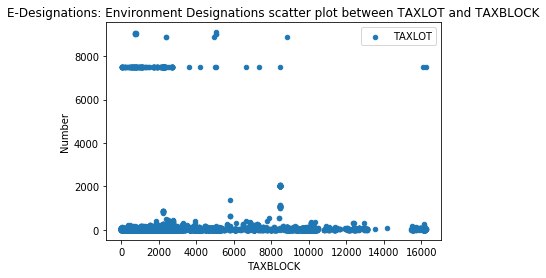

In [31]:
dfplot1 = df2columns.plot(x="TAXBLOCK", y="TAXLOT", title='E-Designations: Environment Designations scatter plot between TAXLOT and TAXBLOCK', kind='scatter')
#dfplot1 = df2columns.plot(x='TAXBLOCK', y='TAXLOT');
dfplot1.set_ylabel("Number");
dfplot1.legend(["TAXLOT"])

Figure 1: scatter plot between variable TAXBLOCK: A five digit numeric code that represents the tax block where the E-desigination is located, and variable TAXLOT: A four digit numeric code that represents the tax block where the E-desigination is located, between the dates 4/28/1983 to 2/07/2007.

In [32]:
df2columns.columns

Index(['TAXBLOCK', 'TAXLOT'], dtype='object')

In [33]:
df2columns.size

22724

In [34]:
url = "https://data.cityofnewyork.us/resource/b8cy-fje8.json"

In [35]:
df2 = pd.read_json(url)

In [36]:
df2.head(8)

,_0,_0_1,_1,_1_1,_3,_319,_4_28_1983_0_00,_82_252k,_830178_zmk,column_10,column_8,e_1
0,0,0,10,1,3,319,1983-04-28T00:00:00.000,82-252K,830178 ZMK,NaN,NaN,E-1
1,0,0,11,1,3,319,1983-04-28T00:00:00.000,82-252K,830178 ZMK,NaN,NaN,E-1
2,0,0,14,1,3,319,1983-04-28T00:00:00.000,82-252K,830178 ZMK,NaN,NaN,E-1
3,0,0,15,1,3,319,1983-04-28T00:00:00.000,82-252K,830178 ZMK,NaN,NaN,E-1
4,0,0,16,1,3,319,1983-04-28T00:00:00.000,82-252K,830178 ZMK,NaN,NaN,E-1
5,0,0,17,1,3,319,1983-04-28T00:00:00.000,82-252K,830178 ZMK,NaN,NaN,E-1
6,0,0,18,1,3,319,1983-04-28T00:00:00.000,82-252K,830178 ZMK,NaN,NaN,E-1
7,0,0,19,1,3,319,1983-04-28T00:00:00.000,82-252K,830178 ZMK,NaN,NaN,E-1


In [37]:
df2.tail(8)

,_0,_0_1,_1,_1_1,_3,_319,_4_28_1983_0_00,_82_252k,_830178_zmk,column_10,column_8,e_1
992,1,0,41,1,1,708,2005-01-19T00:00:00.000,03DCP031M,"040499 ZMM, 040507 MMM, 040508 MMM, 040499A ZMM",NaN,NaN,E-137
993,1,0,42,1,1,708,2005-01-19T00:00:00.000,03DCP031M,"040499 ZMM, 040507 MMM, 040508 MMM, 040499A ZMM",NaN,NaN,E-137
994,1,0,43,1,1,708,2005-01-19T00:00:00.000,03DCP031M,"040499 ZMM, 040507 MMM, 040508 MMM, 040499A ZMM",NaN,NaN,E-137
995,1,0,46,1,1,708,2005-01-19T00:00:00.000,03DCP031M,"040499 ZMM, 040507 MMM, 040508 MMM, 040499A ZMM",NaN,NaN,E-137
996,1,0,62,1,1,708,2005-01-19T00:00:00.000,03DCP031M,"040499 ZMM, 040507 MMM, 040508 MMM, 040499A ZMM",NaN,NaN,E-137
997,1,0,65,1,1,708,2005-01-19T00:00:00.000,03DCP031M,"040499 ZMM, 040507 MMM, 040508 MMM, 040499A ZMM",NaN,NaN,E-137
998,1,0,1,1,1,709,2005-01-19T00:00:00.000,03DCP031M,"040499 ZMM, 040507 MMM, 040508 MMM, 040499A ZMM",NaN,NaN,E-137
999,1,0,13,1,1,709,2005-01-19T00:00:00.000,03DCP031M,"040499 ZMM, 040507 MMM, 040508 MMM, 040499A ZMM",NaN,NaN,E-137


In [38]:
df22columns = df2[['_4_28_1983_0_00', '_1', '_319']]

In [39]:
df22columns.head(8)

,_4_28_1983_0_00,_1,_319
0,1983-04-28T00:00:00.000,10,319
1,1983-04-28T00:00:00.000,11,319
2,1983-04-28T00:00:00.000,14,319
3,1983-04-28T00:00:00.000,15,319
4,1983-04-28T00:00:00.000,16,319
5,1983-04-28T00:00:00.000,17,319
6,1983-04-28T00:00:00.000,18,319
7,1983-04-28T00:00:00.000,19,319


In [40]:
df22columns.rename(columns = {'_4_28_1983_0_00':'Date', 
               '_1':'TAXLOT', 
               '_319': 'TAXBLOCK'}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


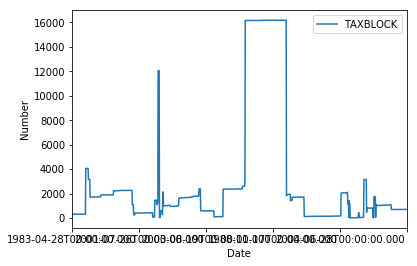

In [41]:
dfplot2 = df22columns.plot(x='Date', y='TAXBLOCK');
dfplot2.set_ylabel("Number");

In [42]:
df22columns["Date"] = df22columns["Date"].apply(lambda x: pd.Timestamp(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


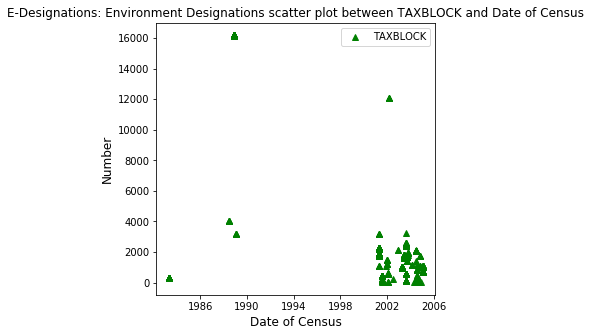

In [43]:
#dfplot2 = df22columns.plot(x='Date', y='TAXBLOCK');
#dfplot2.set_title("E-Designations: Environment Designations scatter plot between TAXBLOCK and Date of Census")
#dfplot2.set_ylabel("Number");

figure, dfplot2 = plt.subplots(figsize = (5,5))
dfplot2.plot(df22columns.Date,df22columns.TAXBLOCK,'g^',label = 'TAXBLOCK')
dfplot2.legend(loc='best')
plt.xlabel('Date of Census', fontsize = 12)
plt.ylabel('Number', fontsize = 12)
plt.title(r'E-Designations: Environment Designations scatter plot between TAXBLOCK and Date of Census', fontsize = 12)
plt.show()

Figure 2: scatter plot between variable TAXBLOCK: A five digit numeric code that represents the tax block where the E-desigination is located, and dates between 4/28/1983 to 2/07/2007. There are gaps between dates, especially between 1989 and 2001. 

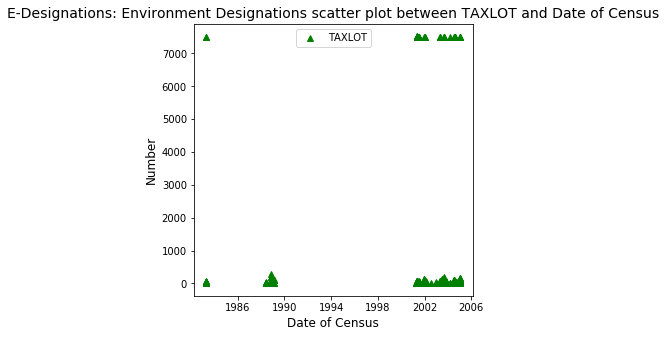

In [44]:
#dfplot3 = df22columns.plot(x='Date', y='TAXLOT');
#dfplot3.set_ylabel("Number");

figure, dfplot3 = plt.subplots(figsize = (5,5))
dfplot3.plot(df22columns.Date,df22columns.TAXLOT,'g^',label = 'TAXLOT')
dfplot3.legend(loc='best')
plt.xlabel('Date of Census', fontsize = 12)
plt.ylabel('Number', fontsize = 12)
plt.title(r'E-Designations: Environment Designations scatter plot between TAXLOT and Date of Census', fontsize = 14)
plt.show()

Figure 3: scatter plot between variable TAXLOT: A four digit numeric code that represents the tax block where the E-desigination is located, and dates between 4/28/1983 to 2/07/2007. There are gaps between dates, especially between 1989 and 2001. 